In [1]:
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Final_data.csv')
print('Shape:', df.shape)
df.head()


Saving Final_data.csv to Final_data.csv
Shape: (20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [3]:

label_col = "Workout_Type"
df = df.dropna(subset=[label_col]).copy()
df[label_col] = df[label_col].astype(str).str.strip().str.lower()

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in df.select_dtypes(include=["object", "category"]).columns if c != label_col]

num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

for c in cat_cols:
    top_vals = df[c].value_counts().index[:20]
    df[c] = df[c].where(df[c].isin(top_vals), other="other")

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,...,Workout_Russian twists,Workout_Seated cable rows,Workout_Skull crushers,Workout_Standing calf raises,Workout_Triceps dips,Workout_Wrist curl,Workout_other,Burns_Calories_Bin_Low,Burns_Calories_Bin_Medium,Burns_Calories_Bin_Very High
0,34.91,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,strength,26.800377,...,False,False,False,False,False,False,False,False,True,False
1,23.37,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,hiit,27.655021,...,False,False,False,False,False,False,True,False,False,False
2,33.20,58.98,1.67,175.04,123.95,54.96,0.91,802.26,cardio,24.320821,...,False,False,False,True,False,False,False,False,False,False
3,38.69,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,hiit,32.813572,...,False,False,False,False,False,False,True,False,False,False
4,45.09,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,strength,17.307319,...,False,False,False,False,False,False,True,True,False,False


In [5]:
X = df.drop(columns=[label_col])
y = df[label_col]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [7]:

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))



Model Accuracy: 86.08%

Classification Report:
              precision    recall  f1-score   support

      cardio       0.80      0.75      0.77       985
        hiit       0.94      0.95      0.94       995
    strength       0.77      0.76      0.76      1014
        yoga       0.93      0.99      0.96      1006

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



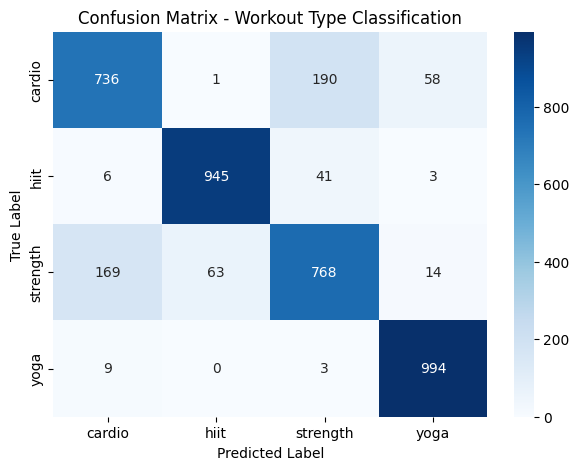

/tmp/ipython-input-1150903801.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


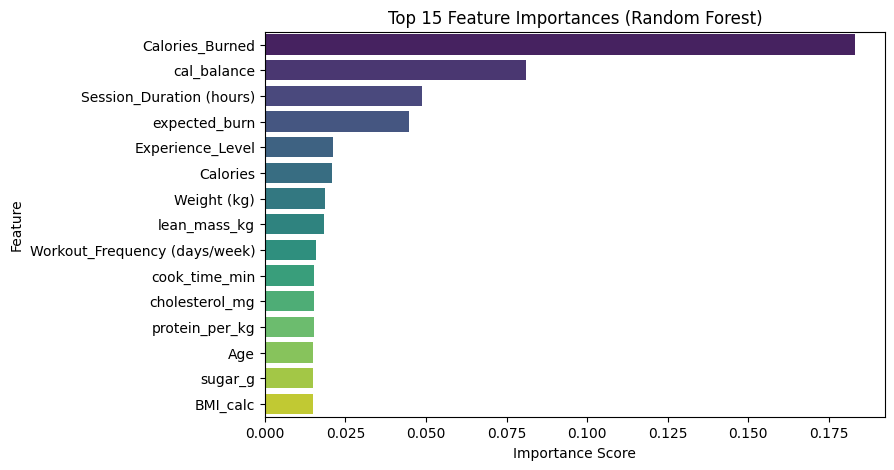

In [8]:

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix - Workout Type Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
